Softmax Regression for MNIST Digit Classification
1) Decision Function:
Implement the Softmax function and the Prediction function.b

In [2]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) 
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)
assert np.allclose(np.sum(softmax_output, axis=1), 1) 
print("Softmax function passed the test case!")

def predict_softmax(X, W, b):
    z = np.dot(X, W) + b
    probabilities = softmax(z)
    return np.argmax(probabilities, axis=1)
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])
b_test = np.array([0.1, 0.2, 0.3])
y_pred_test = predict_softmax(X_test, W_test, b_test)
assert y_pred_test.shape == (3,), "Test failed: Incorrect output shape"
print("Predicted class labels:", y_pred_test)


Softmax function passed the test case!
Predicted class labels: [1 1 0]


2) Loss and Cost Function:
Implement the Categorical Cross-Entropy Loss function and the Cost function.

In [4]:
def loss_softmax(y_pred, y):
    loss = -np.mean(np.sum(y * np.log(y_pred + 1e-9), axis=1))  # Small value for numerical stability
    return loss

y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred_correct = np.array([[0.9, 0.05, 0.05], [0.1, 0.85, 0.05], [0.05, 0.1, 0.85]])
y_pred_incorrect = np.array([[0.05, 0.05, 0.9], [0.1, 0.05, 0.85], [0.85, 0.1, 0.05]])
loss_correct = loss_softmax(y_pred_correct, y_true)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true)
assert loss_correct < loss_incorrect, "Test failed: Incorrect loss comparison"
print("Cross-Entropy Loss (Correct Predictions):", loss_correct)
print("Cross-Entropy Loss (Incorrect Predictions):", loss_incorrect)


Cross-Entropy Loss (Correct Predictions): 0.14346612372977466
Cross-Entropy Loss (Incorrect Predictions): 2.995732253553991


3) Gradient Descent Algorithm:
Implement the Compute Gradients function and the Gradient Descent function.

In [6]:
def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]  
    y_pred = softmax(np.dot(X, W) + b)  
    grad_W = np.dot(X.T, (y_pred - y)) / n  
    grad_b = np.sum(y_pred - y, axis=0) / n  
    return grad_W, grad_b

In [7]:
import numpy as np
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  
b_test = np.array([0.1, 0.2, 0.3])  
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)
print("Gradient w.r.t. Weights (W):\n", grad_W)
print("Gradient w.r.t. Bias (b):\n", grad_b)


Gradient w.r.t. Weights (W):
 [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. Bias (b):
 [-0.03290036  0.02484708  0.00805328]


In [13]:
def compute_cost(X, y, W, b):
    m = X.shape[0]
    logits = np.dot(X, W) + b
    probs = softmax(logits)
    cost = -np.sum(y * np.log(probs + 1e-8)) / m
    return cost

def gradient_descent_softmax(X, y, W, b, alpha, n_iter):
    cost_history = []
    for _ in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost_history.append(cost_softmax(X, y, W, b))
    return W, b, cost_history


In [15]:

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    m = X.shape[0]
    cost_history = []
    
    for i in range(n_iter):
        logits = np.dot(X, W) + b
        probs = softmax(logits)
        dW = np.dot(X.T, (probs - y)) / m
        db = np.sum(probs - y, axis=0) / m
        W -= alpha * dW
        b -= alpha * db
        cost = compute_cost(X, y, W, b)
        cost_history.append(cost)
        if show_cost and i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    return W, b, cost_history
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  
W_test = np.random.randn(2, 3) * 0.01  
b_test = np.zeros(3) 
W_opt, b_opt, cost_history = gradient_descent_softmax(X_test, y_test, W_test, b_test, alpha=0.1, n_iter=100)

# Output result
print("Optimized Weights (W):\n", W_opt)
print("Optimized Biases (b):\n", b_opt)
print("Final Cost:", cost_history[-1])


Optimized Weights (W):
 [[-0.86867544 -0.05444299  0.90685361]
 [ 0.87132002  0.08190673 -0.98281126]]
Optimized Biases (b):
 [ 0.01262437  0.04295984 -0.05558421]
Final Cost: 0.7593125415897376


4) Preparing the Dataset:
Implement the function to load and prepare MNIST dataset.
Implement the function to plot sample images.
Question 1: Is extracting pixel values sufficient for effective feature extraction? Why or why not?

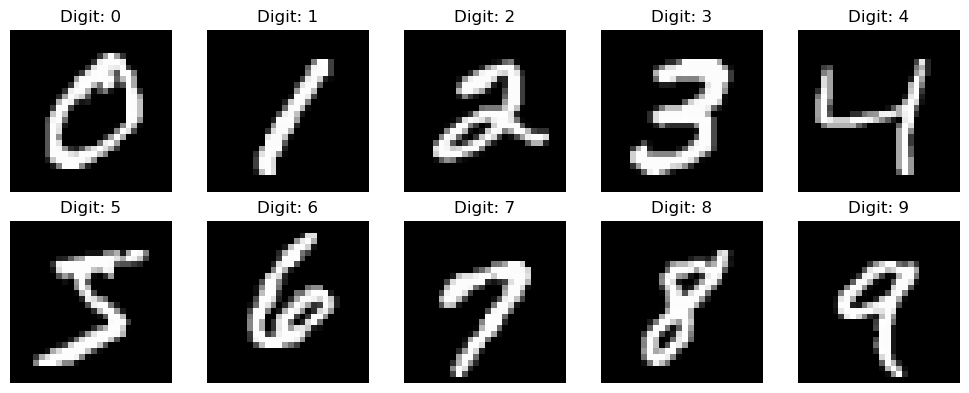

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def plot_sample_images(X, y):
    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y) 
    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]  
        image = X[index].reshape(28, 28) 
        plt.subplot(2, 5, i + 1)  
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    df = pd.read_csv(csv_file)
    y = df.iloc[:, 0].values  
    X = df.iloc[:, 1:].values  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    plot_sample_images(X, y)
    return X_train, X_test, y_train, y_test
csv_file = 'mnist_dataset.csv' 
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file)


5) Training the Model:
Train the Softmax Regression Model using the dataset.


In [21]:
# Assert that X and y have matching lengths
assert len(X_train) == len(y_train), f"Error: X and y have different lengths! X={len(X_train)}, y={len(y_train)}"
print("Move forward: Dimension of Feture Matrix X and label vector y matched.")

Move forward: Dimension of Feture Matrix X and label vector y matched.


In [23]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (48000, 784)
Test data shape: (12000, 784)


Iteration 0: Cost 13.205408060926265
Iteration 100: Cost 1.8508508738827243
Iteration 200: Cost 4.527271041942248
Iteration 300: Cost 1.4939309579117412
Iteration 400: Cost 1.4486931395714322
Iteration 500: Cost 1.4341600852321557
Iteration 600: Cost 1.4525589835281898
Iteration 700: Cost 1.3702082205128852
Iteration 800: Cost 1.7020055320750198
Iteration 900: Cost 1.4318575477454227


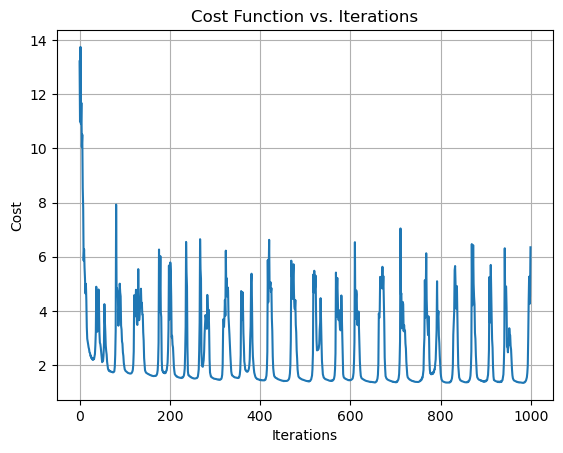

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Check if y_train is one-hot encoded
if len(y_train.shape) == 1:
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for newer versions of sklearn
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))  # One-hot encode labels
    y_test = encoder.transform(y_test.reshape(-1, 1))  # One-hot encode test labels

# Now y_train is one-hot encoded, and we can proceed to use it
d = X_train.shape[1]  # Number of features (columns in X_train)
c = y_train.shape[1]  # Number of classes (columns in y_train after one-hot encoding)

# Initialize weights with small random values and biases with zeros
W = np.random.randn(d, c) * 0.01  # Small random weights initialized
b = np.zeros(c)  # Bias initialized to 0

# Set hyperparameters for gradient descent
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations to run gradient descent

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot the cost history to visualize the convergence
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

6) Evaluating Model Performance:
Compute Confusion Matrix, Precision, Recall, and F1-score.
Visualize the Confusion Matrix.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels
    y_pred (numpy.ndarray): Predicted labels

    Returns:
    tuple: Confusion matrix, precision, recall, F1 score
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, precision, recall, f1

Linear Separability and Logistic Regression
1) Re-implement the given Logistic Regression Code for:
Linearly separable data.
Non-linearly separable data.
Plot decision boundaries for both datasets.

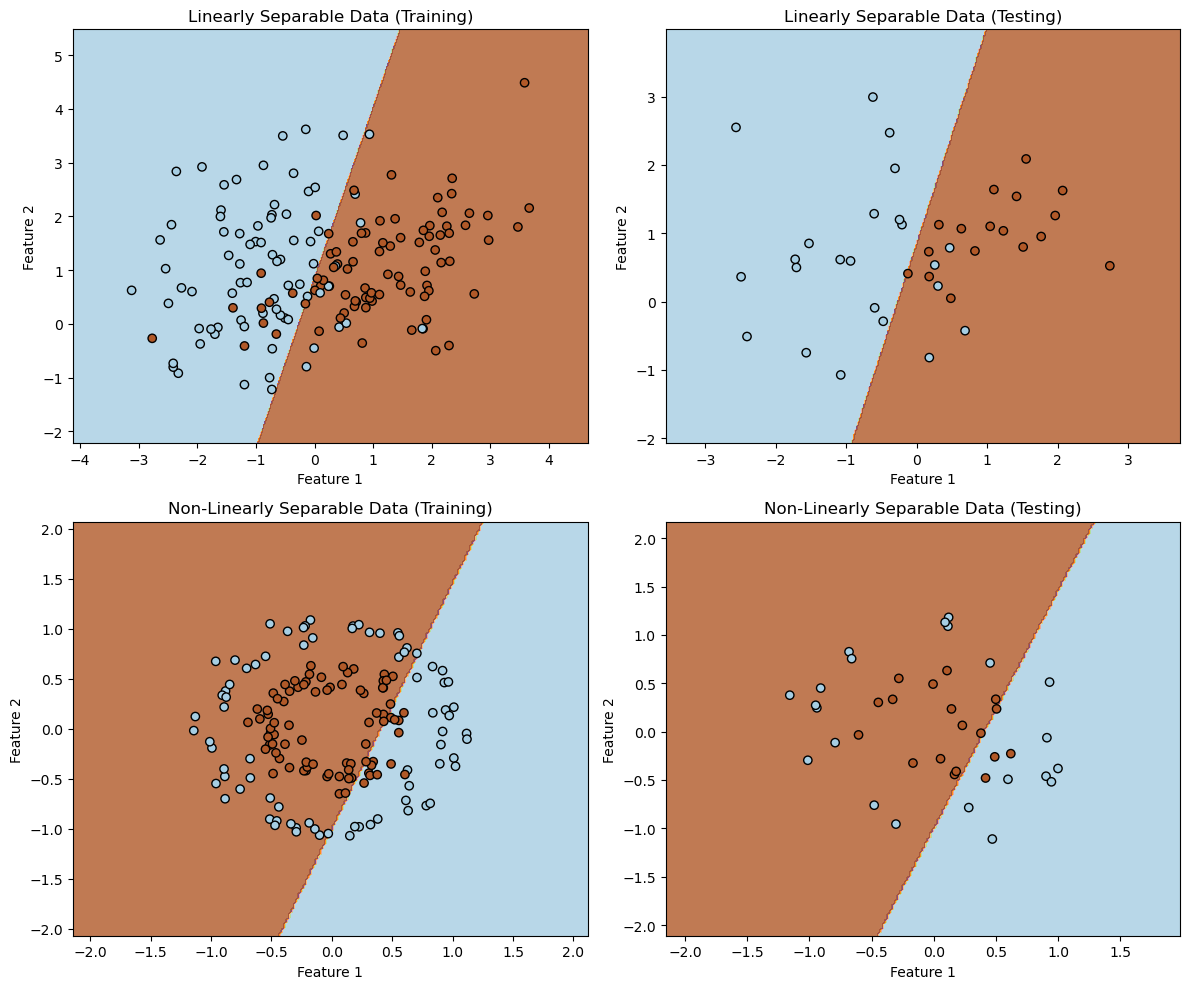

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate linearly separable dataset
X_linear_separable, y_linear_separable = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
    n_clusters_per_class=1, random_state=42
)

# Split the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear_separable, y_linear_separable, test_size=0.2, random_state=42
)

# Train logistic regression model on linearly separable data
logistic_model_linear_separable = LogisticRegression()
logistic_model_linear_separable.fit(X_train_linear, y_train_linear)

# Generate non-linearly separable dataset (circles)
X_non_linear_separable, y_non_linear_separable = make_circles(
    n_samples=200, noise=0.1, factor=0.5, random_state=42
)

# Split the data into training and testing sets
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(
    X_non_linear_separable, y_non_linear_separable, test_size=0.2, random_state=42
)

# Train logistic regression model on non-linearly separable data
logistic_model_non_linear_separable = LogisticRegression()
logistic_model_non_linear_separable.fit(X_train_non_linear, y_train_non_linear)


# Plot decision boundaries for linearly and non-linearly separable data
def plot_decision_boundary(ax, model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot decision boundary for linearly separable data (Training)
plot_decision_boundary(
    axes[0, 0], logistic_model_linear_separable, X_train_linear, y_train_linear,
    "Linearly Separable Data (Training)"
)

# Plot decision boundary for linearly separable data (Testing)
plot_decision_boundary(
    axes[0, 1], logistic_model_linear_separable, X_test_linear, y_test_linear,
    "Linearly Separable Data (Testing)"
)

# Plot decision boundary for non-linearly separable data (Training)
plot_decision_boundary(
    axes[1, 0], logistic_model_non_linear_separable, X_train_non_linear, y_train_non_linear,
    "Non-Linearly Separable Data (Training)"
)

# Plot decision boundary for non-linearly separable data (Testing)
plot_decision_boundary(
    axes[1, 1], logistic_model_non_linear_separable, X_test_non_linear, y_test_non_linear,
    "Non-Linearly Separable Data (Testing)"
)

plt.tight_layout()

# Save the plots as PNG files
plt.savefig("decision_boundaries.png")
plt.show()


2) Answer the following questions:
Question 2: Provide an interpretation of the output based on your understanding.

Logistic regression achieves high success rates on separable data arrangements due to its proper division of different classes using its decision boundary. The Bottom Row data shown illustrates how the model faces problems because of its inability to produce linear boundaries during non-linear data classification.

Question 3: Describe any challenges you faced while implementing the code.

The one-hot encoding of my labels created difficulties so I solved it through the use of OneHotEncoder from sklearn. A problem with numerical stability occurred when using the softmax function because of large input values so I introduced a new stability method by subtracting the maximum value. I needed to modify the learning rate and observe the cost values because gradient descent failed to reach convergence. The process of tracking cost history for plotting was initially forgotten until I resolved it immediately.